# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 15 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])

rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 5s


In [8]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [11]:
#Conserve headers
headers = original_NT.columns.values.tolist()

##### #Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
##### data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
##### data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [12]:
#Reattach headers
# data_T.columns =  np.hstack((headers, ['Empty']));
# data_NT.columns = np.hstack((headers, ['Empty']));

data_T.columns =  np.hstack((headers));
data_NT.columns = np.hstack((headers));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


## Remove Empty Rows

In [13]:
data_T = data_T.dropna()

In [14]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [15]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [16]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,1635812851.366,809.890110,780.476190,798.205128,743.406593,785.311355


## Save RAW Data to File

In [17]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation

In [18]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

(119, 810)

In [19]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 810)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [20]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.795194,-0.121172,0.069205,-2.103254,-0.647116,...,1.883061e-16,1.745045e-16,1.544986e-16,1.448308e-16,1.547404e-16,1.846458e-16,1.476364e-16,1.515523e-16,1.510991e-16,1.629086e-16
std,13.221727,13.962959,10.783482,15.090785,48.215973,29.464956,27.057741,19.906972,39.864481,103.172259,...,1.326495e-16,1.444510e-16,1.269430e-16,1.087036e-16,1.012431e-16,1.309267e-16,1.119076e-16,1.210018e-16,1.094171e-16,1.336611e-16
min,742.197802,753.641026,778.260073,731.721612,730.996337,-88.384188,-79.917043,-84.016933,-130.084391,-210.246429,...,1.682008e-17,6.015924e-18,1.900429e-17,7.931615e-18,2.128355e-17,1.518165e-17,1.188983e-17,1.419177e-17,0.000000e+00,0.000000e+00
25%,773.142857,786.197802,785.391941,770.543956,795.304029,-20.452674,-10.171238,-8.063057,-17.210459,-56.006977,...,9.230115e-17,7.334713e-17,7.405775e-17,7.082150e-17,7.602051e-17,9.593048e-17,6.260944e-17,6.938637e-17,7.105427e-17,7.944109e-17
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.764957,3.152271,1.392108,0.776751,-7.501446,...,1.491212e-16,1.309328e-16,1.194447e-16,1.221453e-16,1.237816e-16,1.576475e-16,1.158174e-16,1.165273e-16,1.280949e-16,1.137423e-16
75%,790.065934,797.560440,797.399267,784.102564,849.296703,18.143992,11.409339,11.061487,15.138016,66.080933,...,2.449648e-16,2.106828e-16,1.944893e-16,1.750761e-16,2.196927e-16,2.355246e-16,2.025191e-16,1.702570e-16,2.139017e-16,1.913195e-16
max,797.479853,813.838828,826.329670,816.578755,970.981685,81.924841,93.667981,65.789165,145.152860,389.591801,...,6.238957e-16,6.452308e-16,7.038281e-16,6.440853e-16,4.659868e-16,9.722256e-16,4.971045e-16,6.153708e-16,5.329071e-16,6.787450e-16


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(pd.DataFrame(X_NT).head()))

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [22]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,1.439227,-0.123772,-0.581400,4.849069,7.663767,...,4.706894e-17,3.404702e-17,3.489199e-17,3.983879e-17,4.338665e-17,4.854704e-17,4.007357e-17,4.649238e-17,4.644427e-17,4.273157e-17
std,118.126749,251.525994,217.512393,104.498981,33.160809,254.559496,381.727887,256.604333,246.614039,87.697119,...,3.940232e-17,2.291741e-17,2.453074e-17,3.198417e-17,2.243436e-17,2.956604e-17,2.879612e-17,4.108687e-17,3.984125e-17,2.391119e-17
min,732.796093,350.818071,532.069597,664.499389,705.665446,-628.239954,-655.880639,-731.972815,-460.710955,-218.204290,...,4.615758e-18,2.759144e-18,2.022967e-18,2.964421e-20,1.887122e-18,6.518450e-18,4.611536e-18,8.939066e-18,2.359224e-18,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,-34.380751,-320.332371,-73.953916,-43.008357,-37.787215,...,1.936982e-17,1.839066e-17,1.849984e-17,1.699074e-17,2.899532e-17,2.796610e-17,1.803535e-17,2.468225e-17,2.512148e-17,2.047150e-17
50%,805.189255,626.153846,882.954823,803.308913,794.645910,-0.355619,88.870928,7.618361,-12.709321,8.080558,...,3.816092e-17,2.602471e-17,2.690037e-17,2.963807e-17,3.860086e-17,3.544832e-17,3.376057e-17,3.576977e-17,4.189529e-17,4.213000e-17
75%,934.731380,967.301587,950.042735,876.507937,810.024420,30.105383,252.124660,124.322869,29.953412,45.431320,...,5.551883e-17,4.130061e-17,4.432209e-17,5.452344e-17,6.176773e-17,7.378400e-17,6.070668e-17,5.785969e-17,5.617334e-17,6.525182e-17
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,717.580021,901.701208,607.799946,898.762093,231.658823,...,1.747216e-16,8.929123e-17,1.135637e-16,1.274392e-16,9.698879e-17,1.268587e-16,1.192844e-16,2.085431e-16,2.197232e-16,8.815618e-17


In [23]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [24]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [25]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [26]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




## Randomize the Dataset

In [27]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Target
0,782.571429,780.798535,772.014652,814.322344,28.469072,13.106933,13.783315,12.441163,-132.620367,756.286012,...,8.033753e-17,1.292062e-16,4.749794e-17,1.079862e-16,2.718974e-16,1.188983e-17,1.702570e-16,1.464821e-16,7.746143e-17,0.0
1,777.091575,778.703297,761.135531,828.586081,2.876815,18.569799,5.418010,16.209727,-39.028683,795.644426,...,2.598465e-16,2.084718e-16,1.299450e-16,1.185649e-16,2.152697e-16,9.146794e-17,1.223347e-16,2.016698e-16,2.688116e-16,0.0
2,811.340659,787.326007,793.128205,817.384615,-26.445273,-24.921430,-16.961190,-32.270126,-75.107389,771.445689,...,1.628967e-16,8.288222e-17,1.983618e-16,1.190378e-16,1.863922e-16,1.663245e-16,1.317942e-16,2.543356e-16,1.004859e-16,0.0
3,790.307692,791.677656,779.670330,865.494505,-28.352370,-9.585121,2.702886,16.823580,19.584877,810.013696,...,1.528839e-16,1.370361e-16,1.968698e-16,4.112391e-17,1.420874e-16,1.253895e-16,8.683497e-17,1.776357e-16,1.790181e-16,0.0
4,796.324786,797.399267,786.385836,835.341880,32.789974,11.407510,-17.332182,7.266221,35.819175,787.050999,...,1.072853e-16,2.590975e-17,1.501115e-16,2.020176e-16,1.079965e-16,6.068239e-17,2.430646e-16,1.776357e-16,1.065814e-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,408.907204,637.234432,1145.329670,765.836386,-169.656420,254.302471,106.306123,-302.679311,-63.199528,1350.363173,...,2.685814e-17,2.184802e-17,2.062161e-17,4.928406e-17,2.448588e-17,3.376057e-17,3.966008e-17,2.512148e-17,1.986027e-17,1.0
334,799.978022,782.087912,768.146520,782.168498,-0.365681,-3.604666,9.716559,28.893683,-21.051229,752.669107,...,6.277424e-16,1.627660e-16,1.220081e-16,1.138246e-16,9.722256e-16,4.870511e-16,1.573208e-16,4.618528e-16,4.672865e-16,0.0
335,794.901099,786.117216,774.996337,823.992674,-0.249117,17.763793,8.884535,8.902391,-90.991202,767.378124,...,1.801480e-16,1.851450e-16,1.194823e-16,3.357687e-16,1.257172e-16,1.536668e-16,3.226611e-16,2.886580e-16,1.913195e-16,0.0
336,788.695971,781.362637,785.956044,767.018315,23.014315,-11.128733,-8.822569,15.138016,29.581615,780.057646,...,6.012631e-17,2.389257e-17,1.668627e-16,2.248832e-16,1.047093e-16,3.803920e-17,1.404484e-16,8.881784e-17,2.246933e-16,0.0


## Separating Input and Output

In [28]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Y labeled for plotting or result check
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = list(map(label, y));

## Splitting Dataset into the Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [30]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,803,804,805,806,807,808
0,0.053761,-0.385592,-0.407161,0.053199,0.161681,0.036909,0.084951,0.075260,-1.350976,-0.411279,...,0.651746,-0.328260,0.124459,-0.587518,-0.071514,0.989264,-0.934334,0.483069,0.307930,-0.332534
1,0.015149,-0.401301,-0.562354,0.346922,-0.003601,0.061949,0.031131,0.100745,-0.424892,-0.104689,...,0.434651,1.027603,0.798607,0.254192,0.039626,0.558411,-0.163696,0.062190,0.837421,1.242182
2,0.256474,-0.336654,-0.105971,0.116258,-0.192971,-0.137405,-0.112851,-0.227092,-0.781889,-0.293190,...,-0.471055,0.295324,-0.269524,0.952667,0.044594,0.338696,0.561217,0.145268,1.342716,-0.143054
3,0.108272,-0.304029,-0.297951,1.106951,-0.205287,-0.067107,0.013663,0.104896,0.155086,0.007244,...,-0.066247,0.219696,0.191051,0.937435,-0.773968,0.001601,0.164801,-0.249588,0.606829,0.503226
4,0.150669,-0.261132,-0.202152,0.486039,0.189587,0.029119,-0.115237,0.040266,0.315724,-0.171629,...,0.194440,-0.124719,-0.754071,0.460075,0.916379,-0.257780,-0.461825,1.122505,0.606829,-0.092891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-2.579139,-1.461927,4.918273,-0.945238,-1.117867,1.142500,0.680217,-2.055690,-0.664061,4.216406,...,-0.981020,-0.732199,-0.788615,-0.861902,-0.688237,-0.893172,-0.722537,-0.663903,-0.856449,-0.806563
334,0.176411,-0.375925,-0.462341,-0.608923,-0.024542,-0.039694,0.058787,0.186518,-0.247006,-0.439454,...,1.504784,3.806384,0.409883,0.173164,-0.010175,6.317729,3.667144,0.369457,3.333714,2.875532
335,0.140638,-0.345717,-0.364626,0.252333,-0.023789,0.058255,0.053434,0.051330,-0.939058,-0.324875,...,-0.679519,0.425626,0.600215,0.147378,2.321566,-0.122952,0.438640,1.821563,1.672018,0.604461
336,0.096915,-0.381363,-0.208283,-0.920900,0.126453,-0.074183,-0.060489,0.093497,0.254003,-0.226105,...,0.692641,-0.480918,-0.771227,0.631089,1.156605,-0.282791,-0.681102,0.221274,-0.245323,0.879111


# Principal Component Analysis
## Calculate Principal Components

In [32]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-174432.662286,-24685.062914,12126.173162,2137.968291,13816.809534,-24583.327239,-350.683543,-3412.070703,3457.561981,-5398.400227,...,49.780281,-114.246450,-93.037656,-50.272762,178.048980,21.266844,-115.316360,31.464838,57.665905,39.816500
1,-174432.688773,-24685.034623,12126.195734,2138.008950,13816.764654,-24583.511943,-350.646580,-3412.161525,3457.657170,-5398.544649,...,49.562960,-114.255692,-93.075910,-50.031469,178.091516,21.392918,-115.481157,31.430258,57.992792,39.447175
2,-174432.692928,-24685.003236,12126.245023,2138.037961,13816.714001,-24583.628842,-350.729727,-3412.138966,3457.724240,-5398.733759,...,49.629185,-114.359710,-93.256948,-50.439220,178.480323,20.749659,-115.478711,32.419060,57.724687,39.315162
3,-174432.678929,-24685.037535,12126.174538,2137.981876,13816.803544,-24583.332212,-350.675979,-3412.084278,3457.591221,-5398.481023,...,50.194541,-114.318416,-93.379823,-50.516630,177.837236,20.847890,-115.016766,32.026345,58.085081,40.150884
4,-174432.684051,-24685.020743,12126.213539,2137.983417,13816.777935,-24583.429207,-350.786040,-3412.192820,3457.686355,-5398.691656,...,48.913607,-114.070636,-92.880184,-50.443168,177.532788,20.764553,-115.232361,31.752896,57.029454,39.254345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-174428.955479,-24687.382866,12126.805524,2139.194939,13815.730675,-24585.362338,-347.516792,-3407.113003,3455.847384,-5395.489353,...,49.596796,-114.286053,-92.995907,-51.198640,177.692863,20.791652,-115.792341,30.620717,58.070877,39.738478
334,-174432.729327,-24685.010712,12126.181205,2138.005745,13816.687892,-24583.882975,-350.564032,-3412.227905,3457.797816,-5398.777615,...,49.806366,-113.613869,-93.490253,-50.763953,178.290200,21.161170,-114.966605,31.579765,57.395429,39.806401
335,-174432.701806,-24685.023807,12126.173136,2137.974608,13816.760623,-24583.599131,-350.644757,-3412.116568,3457.674442,-5398.606610,...,49.523468,-114.559350,-93.193691,-50.385014,178.986673,21.173854,-115.725850,32.469639,58.000510,39.889239
336,-174432.654745,-24685.068113,12126.151525,2137.929314,13816.852659,-24583.194277,-350.723080,-3412.013489,3457.543199,-5398.451579,...,49.805116,-114.504451,-93.439219,-51.052261,177.908599,21.250666,-115.486341,31.950201,57.999006,39.663126


## Scaling the Principal Components

In [33]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,-2.827892e-11,1.048038e-12,-4.980058e-12,1.574480e-14,2.967626e-12,-8.467151e-12,-2.178550e-14,4.541766e-13,2.536432e-12,1.746275e-12,...,-4.644214e-14,-2.331550e-14,1.176547e-13,-3.573407e-15,5.676528e-15,-1.946766e-14,-6.200792e-14,3.899642e-14,5.152617e-14,8.073752e-16
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.299941e-01,-4.624583e+00,-2.709196e+00,-6.956390e-01,-3.282983e+00,-3.211140e+00,-5.648898e+00,-3.239466e+00,-7.018160e+00,-3.921085e+00,...,-4.148953e+00,-1.805001e+00,-3.043878e+00,-2.293632e+00,-4.318783e+00,-3.219140e+00,-2.590657e+00,-2.906218e+00,-2.951917e+00,-2.739047e+00
25%,-4.155366e-01,-3.104043e-02,-2.651596e-01,-2.894037e-01,-2.112038e-01,-2.223385e-01,4.674574e-02,-2.470136e-01,-5.271227e-02,-1.875135e-01,...,-5.146462e-01,-6.595593e-01,-6.196114e-01,-6.632091e-01,-5.507251e-01,-6.009003e-01,-6.165504e-01,-4.757903e-01,-6.813063e-01,-5.958014e-01
50%,-3.870284e-01,-1.470630e-02,-2.419432e-01,-2.636968e-01,9.510780e-02,-1.089706e-01,2.984279e-01,-1.525314e-01,2.263319e-01,-1.106057e-03,...,-2.112986e-03,-2.285075e-01,-2.012674e-02,-1.420430e-01,3.008875e-02,7.906697e-02,-1.472825e-01,8.851926e-02,-2.700076e-02,-1.063554e-01
75%,-1.001078e-01,1.650634e-01,-1.965926e-01,-1.889785e-01,1.983144e-01,9.922318e-02,3.551497e-01,-6.988804e-03,4.250352e-01,2.281405e-01,...,5.546908e-01,4.076681e-01,5.050463e-01,5.648844e-01,6.760159e-01,7.999637e-01,5.810828e-01,5.529825e-01,6.535870e-01,5.023803e-01
max,4.664368e+00,3.984497e+00,7.424717e+00,5.953274e+00,4.612079e+00,4.082603e+00,2.841262e+00,5.669224e+00,5.447413e+00,4.683542e+00,...,2.418548e+00,3.745458e+00,4.281058e+00,3.076758e+00,2.391837e+00,2.149158e+00,3.170827e+00,3.413642e+00,2.693837e+00,3.532697e+00


## Image Creation

In [34]:
## Scale all the PCA components on 0-256
# (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)


def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            #pixels.append(m * data[r,c] - mini);
            I = data[r,c]
            pixels.append((((I - mini) / (maxi - mini)) * 255.9).astype(np.uint8)) #Fixed Scaling, save as int

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
        
    return images;
    
all_images      = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(270,15,15,1)
x_test_img  = np.array(x_test_img).reshape(68,15,15,1)
all_images  = np.array(all_images).reshape(338,15,15,1)

## Saving Images

In [35]:
import imageio

# Relative paths to saved folders
TiredImgFolder = cwd + r"\Data\GeneratedImages\Tired"
NotTiredImgFolder = cwd + r"\Data\GeneratedImages\Not Tired"

# Clear the folders
import glob

files = glob.glob(TiredImgFolder + r"\*")
for f in files:
    os.remove(f)

files = glob.glob(NotTiredImgFolder + r"\*")
for f in files:
    os.remove(f)   


ctr=0;
for img in all_images.reshape(338,15,15):
    
    if (y[ctr] == 0): #Not Tired
        fstr = NotTiredImgFolder + r"\img_" + str(ctr) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
    else:
        fstr = TiredImgFolder + r"\img_" + str(ctr) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))

    ctr+=1; #Counter, unique IMG ID

This image is for the: "Not Tired" class.


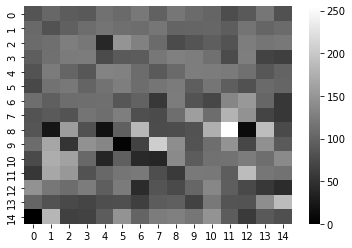

In [36]:
#first row of data
sns.heatmap(gen_images(Z)[0], cmap='gray');
print(f'This image is for the: \"{y_labeled[0]}\" class.')

This image is for the: "Tired" class.


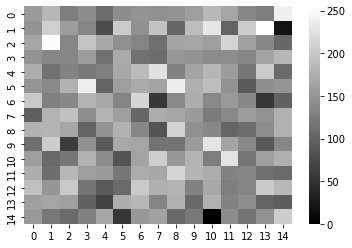

In [37]:
#nth row of data
n=113
sns.heatmap(gen_images(Z)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

# Data Exploration

## General Correlation Matrix for Principal Components

<Figure size 1800x1200 with 0 Axes>

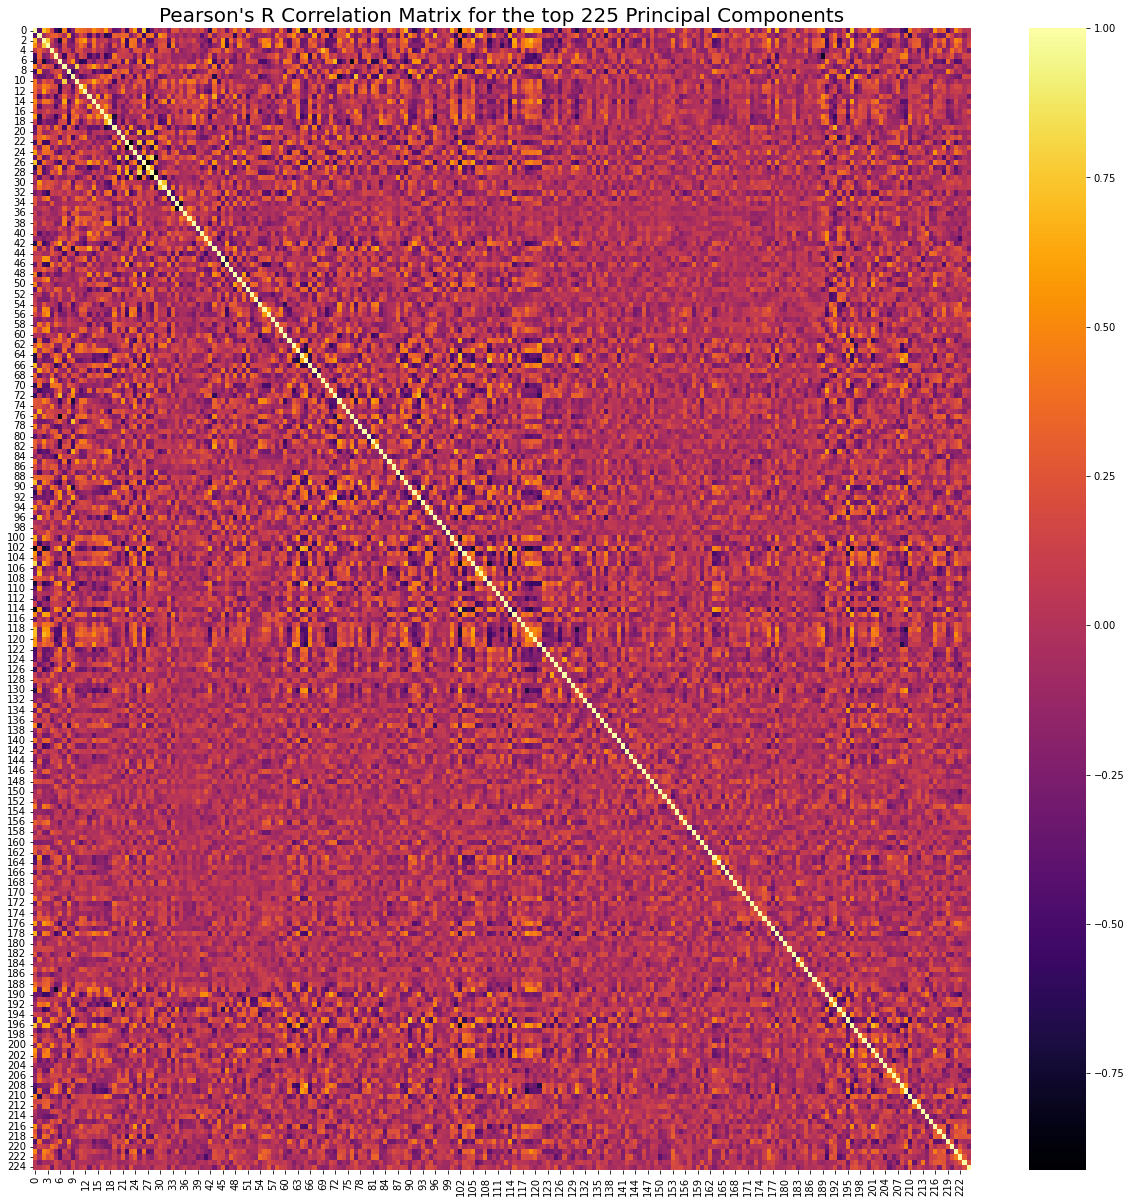

In [38]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(21,21));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=20);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

<Figure size 1800x1200 with 0 Axes>

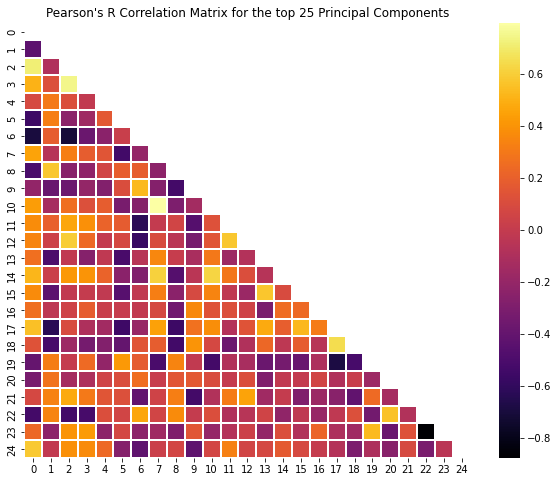

In [39]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson');
mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(10,8));
plt.title("Pearson's R Correlation Matrix for the top 25 Principal Components", fontsize=12);
sns.heatmap(corr_mat, annot=False, lw=0.2, linecolor='white', cmap='inferno', mask=mask);
#print('Too many features to visualize at once!')

## Plotting the Principal Components

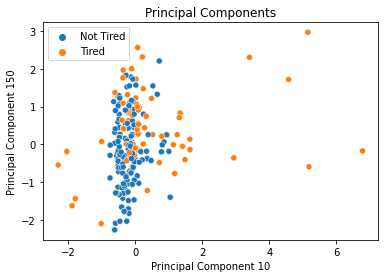

In [40]:
p1=10;
p2=150;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

## PC Distributions

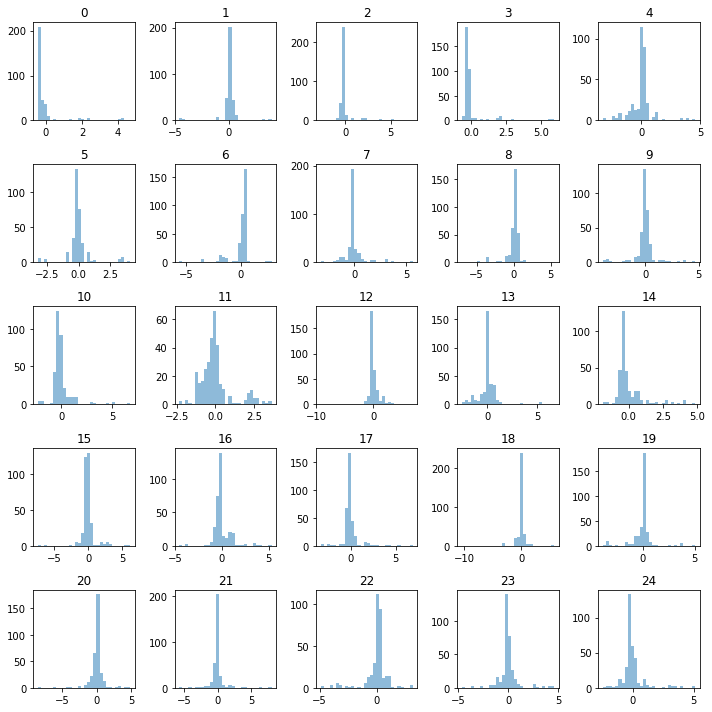

In [41]:
pc_title=[];
for i in range(1,25):
    pc_title.append(f'Principal Component {i}');

Z25 = Z[:,0:25]  

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():      #Catch warnings in code section
    warnings.simplefilter("ignore")
    
    plt.subplots(figsize=(10,10));
    ax = plt.gca();
    pd.DataFrame(Z25).hist(bins=30, figsize=(1,1), grid=False, layout=(5,5), sharex=False, ax=ax, alpha=0.5);
    plt.tight_layout();

# ML Models

## Definitions

In [42]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [43]:
models = []; #to hold: (str: name, model: model, data_to_take: z/img)

In [44]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [45]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 1.04 s


In [46]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model

In [47]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [48]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Basic', mCNNBasic, 'img'))

Wall time: 15.1 s


In [49]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 100.0%


## Advanced CNN Model

In [50]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=256):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [51]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Wall time: 16.9 s


In [52]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 94.118%


## Random Forest Model

In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 357 ms


## Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation

In [56]:
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} returned {CVinternal_results}')
    trun+=1;
    
    

run#0 returned [1.         0.99115044 1.        ]
run#1 returned [1.         1.         0.97321429]
run#2 returned [0.6460177  0.98230088 0.96428571]
run#3 returned [1. 1. 1.]
run#4 returned [1. 1. 1.]


In [62]:
names = [];
for tp in models:
    names.append(tp[0]);
    
CVdf = pd.DataFrame(CV_results);
CVdf.columns = names;
CVdf

,ANN Basic,CNN Basic,CNN Advanced,RF,LR
0,1.00000,1.000000,0.646018,1.0,1.0
1,0.99115,1.000000,0.982301,1.0,1.0
2,1.00000,0.973214,0.964286,1.0,1.0


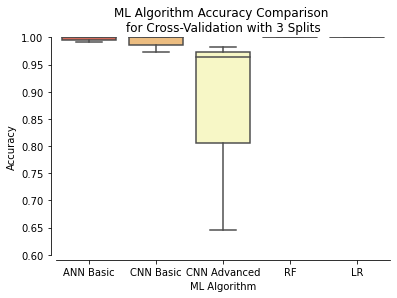

In [67]:
ax2 = sns.boxplot(data=CVdf, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.6,1);

In [59]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

#Reload FG
#from importlib import reload
#reload(FG)